In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from IPython.display import IFrame
import pydotplus
%matplotlib inline

In [42]:
fname = 'phishing.csv'
df = pd.read_csv(fname, header=0, delimiter=';')
labels = df['Result']
features = df.drop('Result', 1)
feature_names = list(features.columns.values)
X_train, X_test, y_train, y_test = train_test_split(features, labels)

In [25]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3, criterion='friedman_mse', verbose=1, min_samples_leaf=3)
gbrt.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(gbrt.score(X_test, y_test)))

      Iter       Train Loss   Remaining Time 
         1           1.2354            0.94s
         2           1.1223            0.92s
         3           1.0286            1.12s
         4           0.9497            1.20s
         5           0.8831            1.16s
         6           0.8253            1.12s
         7           0.7765            1.08s
         8           0.7336            1.05s
         9           0.6969            1.02s
        10           0.6651            1.00s
        20           0.4777            0.85s
        30           0.3911            0.70s
        40           0.3479            0.58s
        50           0.3228            0.47s
        60           0.3017            0.37s
        70           0.2853            0.28s
        80           0.2727            0.18s
        90           0.2615            0.09s
       100           0.2523            0.00s
Training set accuracy: 0.954
Test set accuracy: 0.949


In [5]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Training set accuracy: 0.988
Test set accuracy: 0.969


In [78]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1)
tree.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Training set accuracy: 0.917
Test set accuracy: 0.920


Brute-forcing decision tree classifier

In [7]:
k = 10

In [86]:
for leaf in range(201,-1,-20):
    print("min_samples_leaf: {:.3f}".format(leaf))
    clf = DecisionTreeClassifier(min_samples_leaf=leaf)
    clf.fit(X_train,y_train)
    Y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, Y_pred)
    accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
    print("  Accuracy calculated from the training set: {:.3f}".format(accuracy))
    
    scores = cross_val_score(estimator=clf,
                        X=X_test,
                        y=y_test,
                        scoring="accuracy",
                        cv=k)
    print("  Accuracy calculated using k-fold cross validation: {:.3f}".format(scores.mean()))
    

min_samples_leaf: 201.000
  Accuracy calculated from the training set: 0.000
  Accuracy calculated using k-fold cross validation: 0.893
min_samples_leaf: 181.000
  Accuracy calculated from the training set: 0.000
  Accuracy calculated using k-fold cross validation: 0.893
min_samples_leaf: 161.000
  Accuracy calculated from the training set: 0.000
  Accuracy calculated using k-fold cross validation: 0.886
min_samples_leaf: 141.000
  Accuracy calculated from the training set: 0.000
  Accuracy calculated using k-fold cross validation: 0.886
min_samples_leaf: 121.000
  Accuracy calculated from the training set: 0.000
  Accuracy calculated using k-fold cross validation: 0.886
min_samples_leaf: 101.000
  Accuracy calculated from the training set: 0.000
  Accuracy calculated using k-fold cross validation: 0.886
min_samples_leaf: 81.000
  Accuracy calculated from the training set: 0.000
  Accuracy calculated using k-fold cross validation: 0.887
min_samples_leaf: 61.000
  Accuracy calculated fr

In [9]:
sub_tree_gbrt = gbrt.estimators_[10,0]

In [10]:
dot_data = export_graphviz(sub_tree_gbrt,
                          out_file=None, filled=True,
                           rounded=True,
                           special_characters=True,
                           proportion=True,)
pydotplus.graph_from_dot_data(dot_data).write_png("gbrt.png")

True

In [79]:
export_graphviz(tree, out_file='4node_tree_2min_leaf.dot', class_names=['Legitimate', 'Illegitimate'], 
                feature_names=feature_names,impurity=False, filled=True)

In [80]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.02533639
  0.          0.78382985  0.          0.          0.          0.          0.
  0.12629944  0.03184548  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.02979598
  0.          0.          0.00289286  0.        ]


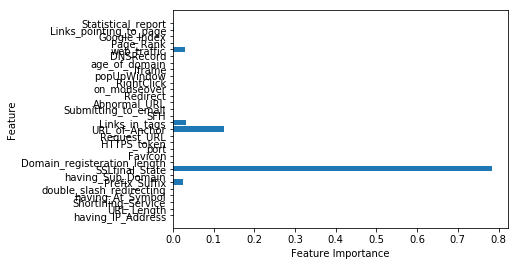

In [81]:
def plot_feature_importances(model):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)
plt.savefig('feat_imp.png', frameon=True, pad_inch=2)

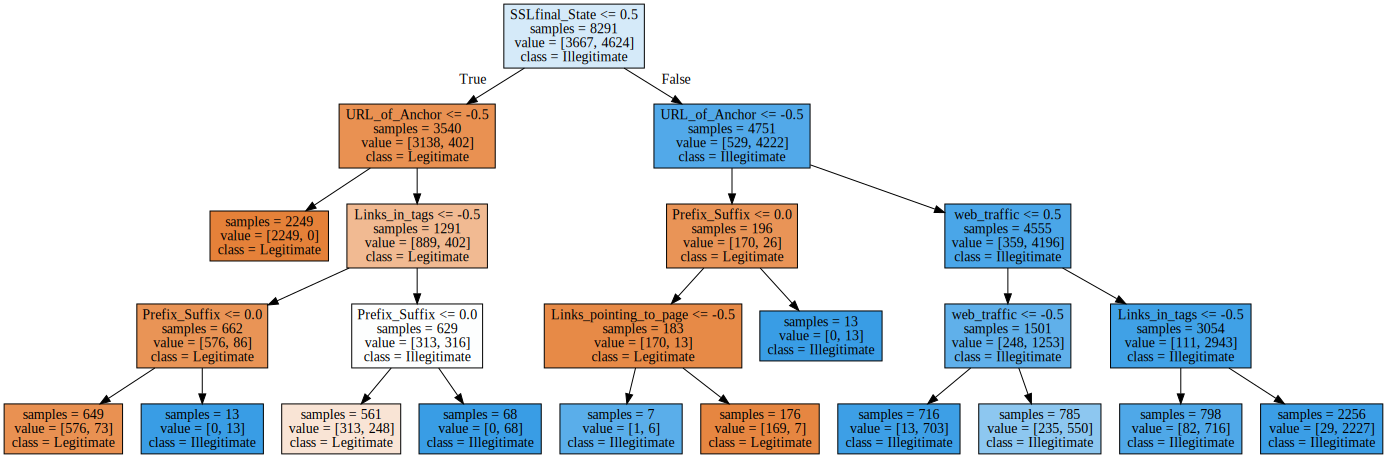

In [82]:
with open('4node_tree_2min_leaf.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [83]:
pydotplus.graph_from_dot_data(dot_graph).write_png("3node_tree.png")

True

In [84]:
dot_data = export_graphviz(sub_tree_gbrt,
                          out_file=None, filled=True,
                           rounded=True,
                           special_characters=True,
                           proportion=True,)
pydotplus.graph_from_dot_data(dot_data).write_png("gbrt10.png")

True

In [27]:
gbrt_scores = cross_val_score(gbrt, features, labels, cv=k)
print("Cross validation scores: {}".format(scores))
print("Average cross validation scores: {}".format(scores.mean()))

      Iter       Train Loss   Remaining Time 
         1           1.2339            1.17s
         2           1.1206            1.13s
         3           1.0262            1.15s
         4           0.9472            1.24s
         5           0.8804            1.35s
         6           0.8233            1.34s
         7           0.7746            1.30s
         8           0.7313            1.27s
         9           0.6947            1.26s
        10           0.6618            1.24s
        20           0.4769            1.05s
        30           0.3925            0.87s
        40           0.3488            0.69s
        50           0.3208            0.57s
        60           0.2992            0.46s
        70           0.2830            0.35s
        80           0.2702            0.23s
        90           0.2610            0.11s
       100           0.2514            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2339            1.14s
        

        20           0.4787            1.04s
        30           0.3951            0.93s
        40           0.3526            0.80s
        50           0.3251            0.66s
        60           0.3029            0.52s
        70           0.2868            0.38s
        80           0.2741            0.24s
        90           0.2616            0.12s
       100           0.2520            0.00s
Cross validation scores: [ 0.93884892  0.9352518   0.95652174  0.94565217  0.92391304  0.96014493
  0.92391304  0.94202899  0.93478261  0.95289855]
Average cross validation scores: 0.941395579189
